# White Wine Quality Regression
### A Continuation on the Red wine quality regression

To demonstrate that with increased data size, the model performance is better

# Load Modules

In [1]:
import numpy as np # for array operations
import pandas as pd # for graphical display of arrays (basically arrays with row and column names)
import seaborn as sns # for plotting graphs
from matplotlib import pyplot as plt # for customizing graphs
%matplotlib inline 
# IPython Notebook function, just ignore
# Models:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split # split data
from sklearn import preprocessing # for scaling
from sklearn.pipeline import make_pipeline # for grouping scaler and model into a wrapper called pipeline, goes into GridSearch
from sklearn.model_selection import GridSearchCV # for cross-validation, determines best hyperparameters
from sklearn.metrics import mean_squared_error, r2_score # performance measures
from sklearn.externals import joblib #for saving model

Just to suppress the warnings sklearn gives:

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Also, for clarity, make numpy print arrays to 2 decimal places

In [3]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

# Load Dataset
We load the dataset into variable data:

In [4]:
# dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
dataset_url = './wine-quality-white.csv'
data = pd.read_csv(dataset_url, sep = ";")

# Data Preview
We'll first try to get familiar with how the dataset is structured

In [5]:
print("Data dimensions: "+ str(data.shape) +"\n")

print("The first entries of the dataset: ")
data.head()

print("\nQuantitative properties of each feature: ")
data.describe()

Data dimensions: (4898, 12)

The first entries of the dataset: 

Quantitative properties of each feature: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We see that the magnitudes of the features are drastically different, later we'll have to standardize the features before we perform any sort of optimization


# Feature Selection
Notice that the Quality column of data is the desired value that we wish to predict. So we split data into X (the features) and y (Quality). 

As we're trying to predict the value of y, it's only natural that we'd want to get to know y better 

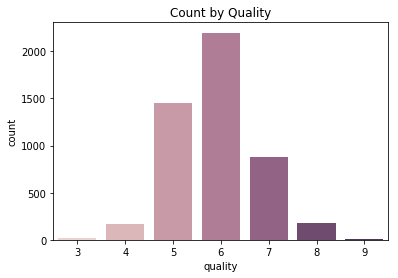

In [6]:
y = data['quality']
X = data.drop(['quality'], axis = 1)

sns.countplot(y, palette = sns.cubehelix_palette(8)).set_title('Count by Quality');

Quality has a distribution that is approximately normal, however, due to the few data collected for quality below 3 and above 8, it may be hard to predict those values. When we train the model later, we'll remember to use different weights for the classes inversely proportional to their frequency.

Now, we split the data into our test-set and training-set using train_test_split from from sklearn.model_selection

In [7]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 817, stratify = y)
X_train = train_data.drop(['quality'], axis = 1)
X_test = test_data.drop(['quality'], axis = 1)
y_train = train_data['quality']
y_test = test_data['quality']

print("X_train dimensions: ", X_train.shape)
print("X_test dimensions: ", X_test.shape)
print("Test set proportion: %.2f" % (X_test.shape[0]/(X_test.shape[0] + X_train.shape[0])))
print("\nX_train: ")
X_train.head()

df_y_train = pd.DataFrame(y_train, columns=['quality'])
df_y_train.head()

X_train dimensions:  (3918, 11)
X_test dimensions:  (980, 11)
Test set proportion: 0.20

X_train: 


,quality
1941,5
1520,6
2378,5
1920,7
2812,6


In [10]:
>>> param_grid = {swarm_data = pd.melt(train_data_scaled, id_vars=["quality"], var_name="Stat Type")
swarm_data.head(10)

,quality,Stat Type,value
0,5,fixed acidity,-0.066153
1,6,fixed acidity,1.699016
2,5,fixed acidity,2.993473
3,7,fixed acidity,1.463660
4,6,fixed acidity,-0.183830
5,5,fixed acidity,0.404559
6,6,fixed acidity,1.699016
7,5,fixed acidity,-0.301508
8,4,fixed acidity,-0.183830
9,5,fixed acidity,-0.536864


Note that the table is 11 times as long since the 11 features are all melted into 1 column.

The swarmplot:

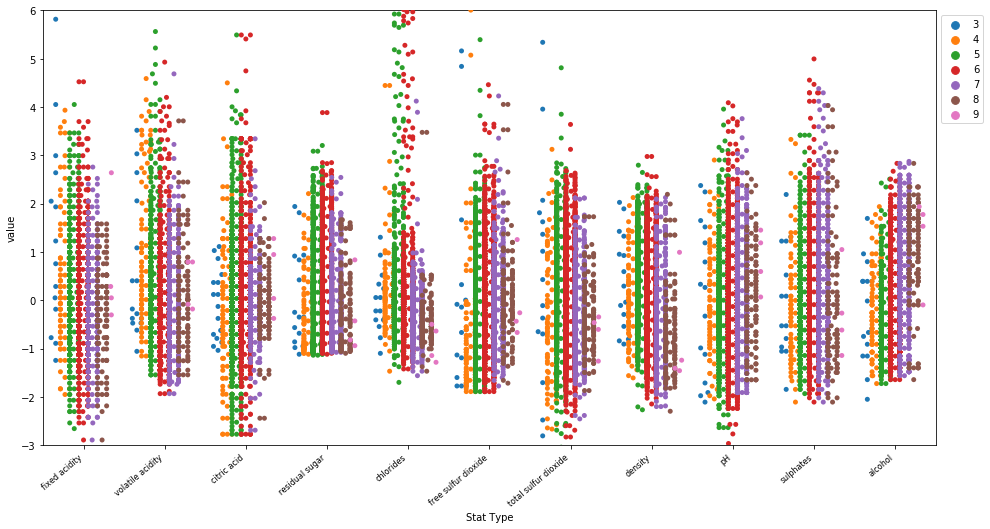

In [11]:
plt.figure(figsize=(16,8));
swarm_ax = sns.swarmplot(x='Stat Type', y='value', hue='quality', data=swarm_data, dodge=True);
swarm_ax.set_xticklabels(swarm_ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.ylim(-3, 6);
plt.legend(bbox_to_anchor=(1, 1), loc=2);

From the graph, there are no distinct separation (referring to vertical separation) between the overall quality, ie. it's not as simple as for example, higher acidity means higher quality. 

This could pose a threat to our model. We'll see how it goes.

# Heatmap

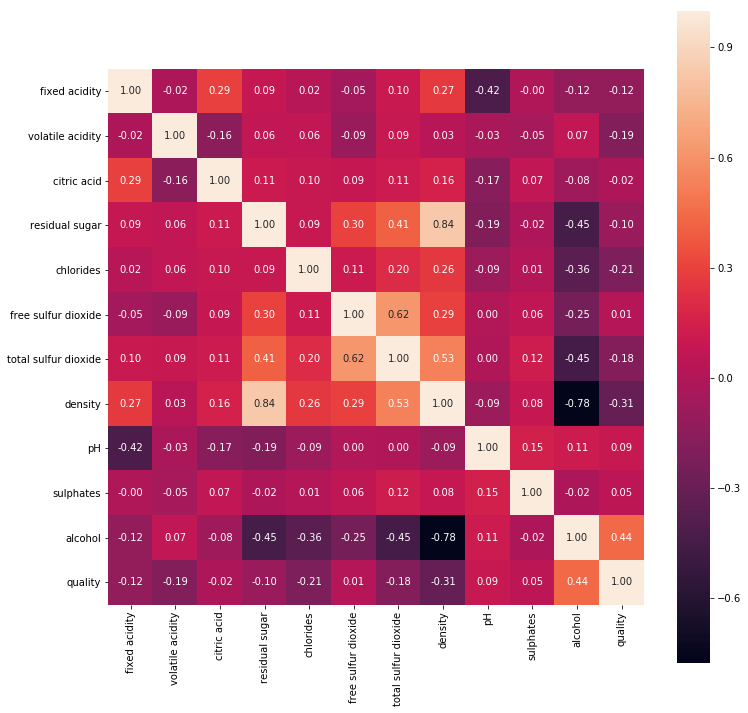

In [12]:
corrmat = train_data.corr()
plt.figure(figsize=(12,12));
sns.heatmap(corrmat, annot = True, square = True, fmt = '.2f');

Nothing too out of the ordinary here either. These features are fine, no risk of having multicollinearity.

# Random Forest

## Cross Validation with Gridsearch

In [ ]:
pipeline_rfr = make_pipeline(
    preprocessing.StandardScaler(),
    RandomForestRegressor(random_state = 111, n_jobs=2)
)

hyperparameters_rfr = {
    'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
    'randomforestregressor__n_estimators': [750, 1000, 1250],
    'randomforestregressor__min_samples_split': [2,4]
}

CV_rfr = GridSearchCV(pipeline_rfr, hyperparameters_rfr, cv=3)

CV_rfr.fit(X_train, y_train)
print("Best Parameters: ", CV_rfr.best_params_)

## Grid Search Results
### Run 1:
```python
hyperparameters_rfr = {
    'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
    'randomforestregressor__n_estimators': [500, 1000, 1500],
    'randomforestregressor__min_samples_split': [2,4]
}

Best Parameters:  {
    'randomforestregressor__max_features': 'sqrt', 
    'randomforestregressor__min_samples_split': 2, 
    'randomforestregressor__n_estimators': 1000
}

R2 score:  0.5298371084730475

Forced Classification Scores:

Precision	Recall	F Score	Support
3	0.000000	0.000000	0.000000	4
4	1.000000	0.030303	0.058824	33
5	0.721014	0.683849	0.701940	291
6	0.666667	0.813636	0.732856	440
7	0.668750	0.607955	0.636905	176
8	1.000000	0.171429	0.292683	35
9	0.000000	0.000000	0.000000	1
```

### Run 2:
```python
hyperparameters_rfr = {
    'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
    'randomforestregressor__n_estimators': [750, 1000, 1250],
    'randomforestregressor__min_samples_split': [2,4]
}

Best Parameters:  {
    'randomforestregressor__max_features': 'sqrt', 
    'randomforestregressor__min_samples_split': 2, 
    'randomforestregressor__n_estimators': 1000
}
```

## Final Model

In [13]:
CV_rfr = make_pipeline(
    preprocessing.StandardScaler(),
    RandomForestRegressor(
        max_features = 'sqrt',
        n_estimators = 1000,
        min_samples_split = 2
    )
)

CV_rfr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

## Performance

Actual Qualities: 
Predicted Qualities: 
Forced Classification: 
R2 score:  0.5277663697209254
Forced Classification Scores:


,Precision,Recall,F Score,Support
3,0.000000,0.000000,0.000000,4
4,1.000000,0.030303,0.058824,33
5,0.717391,0.680412,0.698413,291
6,0.672222,0.825000,0.740816,440
7,0.694268,0.619318,0.654655,176
8,1.000000,0.171429,0.292683,35
9,0.000000,0.000000,0.000000,1


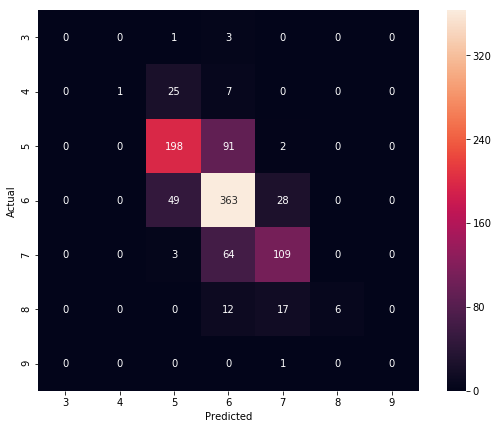

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import r2_score
y_pred_rfr = 0
y_pred_rfr = CV_rfr.predict(X_test)
print("Actual Qualities: ")
y_test.values[0:10]
print("Predicted Qualities: ")
y_pred_rfr[0:10]
print("Forced Classification: ")
y_pred_rfr_int = np.rint(y_pred_rfr)
y_pred_rfr_int[0:10]

# pd.DataFrame(y_pred_rfr_int).describe()
# pd.DataFrame(y_test).describe()

print("R2 score: ", r2_score(y_test, y_pred_rfr))
print("Forced Classification Scores:")

cm = confusion_matrix(y_test, y_pred_rfr_int)
     
df_cm = pd.DataFrame(cm, range(3,10), range(3,10))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')


precision, recall, fscore, support = score(y_test, y_pred_rfr_int);

df_precision = pd.DataFrame(precision, index=range(3, 10), columns=["Precision"])
df_recall = pd.DataFrame(recall, index=range(3, 10), columns=["Recall"])
df_fscore = pd.DataFrame(fscore, index=range(3, 10), columns=["F Score"])
df_support = pd.DataFrame(support, index=range(3, 10), columns=["Support"])

score = pd.concat([df_precision, df_recall, df_fscore, df_support], axis = 1)
score

Let us try a classifier, just for fun:

# Random Forest Classifier
## Cross Validation with Gridsearch

In [ ]:
pipeline_rfc = make_pipeline(
    preprocessing.StandardScaler(), 
    RandomForestClassifier()
)

hyperparameters_rfc = {
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__n_estimators': [500, 1000, 1500],
    'randomforestclassifier__min_samples_split': [2,4]
}

CV_rfc = GridSearchCV(pipeline_rfc, hyperparameters_rfc, cv=3)

CV_rfc.fit(X_train, y_train)
print("Best Parameters = ", CV_rfc.best_params_)

## Grid Search Results:
### Run 1: 
```python
hyperparameters_rfc = {
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__n_estimators': [500, 1000, 1500],
    'randomforestclassifier__min_samples_split': [2,4]
}

Best Parameters =  {
    'randomforestclassifier__max_features': 'sqrt', 
    'randomforestclassifier__min_samples_split': 4, 
    'randomforestclassifier__n_estimators': 1000
}

Classification Scores:
Precision	Recall	F Score	Support
3	0.000000	0.000000	0.000000	4
4	0.800000	0.121212	0.210526	33
5	0.713755	0.659794	0.685714	291
6	0.656420	0.825000	0.731118	440
7	0.727273	0.590909	0.652038	176
8	1.000000	0.285714	0.444444	35
9	0.000000	0.000000	0.000000	1
```

## Final Model:

In [15]:
CV_rfc = RandomForestClassifier( 
    max_features = 'sqrt', 
    n_estimators = 1000,
    min_samples_split = 4
)
CV_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Performance
#### Confusion Matrix:

Actual Qualities: 
[7 7 7 6 7 5 7 6 6 5]
Test set minimum:  3
Test set maximum:  9
Predicted Qualities: 
[7 6 6 6 6 5 7 6 6 5]
Predicted minimum:  4
Predicted maximum:  8
Classification Scores:


,Precision,Recall,F Score,Support
3,0.000000,0.000000,0.000000,4
4,0.666667,0.060606,0.111111,33
5,0.701818,0.663230,0.681979,291
6,0.660000,0.825000,0.733333,440
7,0.730496,0.585227,0.649842,176
8,0.909091,0.285714,0.434783,35
9,0.000000,0.000000,0.000000,1


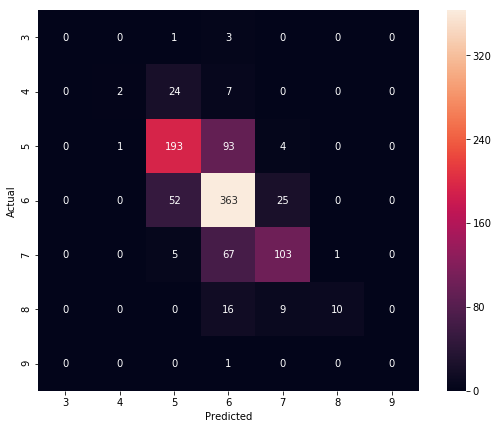

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

y_pred_rfc = 0
y_pred_rfc = CV_rfc.predict(X_test)
print("Actual Qualities: ")
print(y_test.values[0:10])
y_test_min=y_test.min()
y_test_max=y_test.max()
print("Test set minimum: ", y_test_min)
print("Test set maximum: ", y_test_max)
print("Predicted Qualities: ")
print(y_pred_rfc[0:10])
y_pred_rfc_min=y_pred_rfc.min()
y_pred_rfc_max=y_pred_rfc.max()
print("Predicted minimum: ", y_pred_rfc_min)
print("Predicted maximum: ", y_pred_rfc_max)


print("Classification Scores:")

cm = confusion_matrix(y_test, y_pred_rfc)
     
df_cm = pd.DataFrame(cm, index=range(3,10), columns=range(3,10))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')


precision, recall, fscore, support = score(y_test, y_pred_rfc);

df_precision = pd.DataFrame(precision, index=range(y_test_min, y_test_max+1), columns=["Precision"])
df_recall = pd.DataFrame(recall, index=range(y_test_min, y_test_max+1), columns=["Recall"])
df_fscore = pd.DataFrame(fscore, index=range(y_test_min, y_test_max+1), columns=["F Score"])
df_support = pd.DataFrame(support, index=range(y_test_min, y_test_max+1), columns=["Support"])

score = pd.concat([df_precision, df_recall, df_fscore, df_support], axis = 1)
score


# A Comparison Between Random Forest Regressor and Classifier
```python
Classifier
    
    Precision	Recall	F Score	Support
3	0.000000	0.000000	0.000000	4
4	0.800000	0.121212	0.210526	33
5	0.713755	0.659794	0.685714	291
6	0.656420	0.825000	0.731118	440
7	0.727273	0.590909	0.652038	176
8	1.000000	0.285714	0.444444	35
9	0.000000	0.000000	0.000000	1

Regressor:

    Precision	Recall	F Score	Support
3	0.000000	0.000000	0.000000	4
4	1.000000	0.030303	0.058824	33
5	0.721014	0.683849	0.701940	291
6	0.666667	0.813636	0.732856	440
7	0.668750	0.607955	0.636905	176
8	1.000000	0.171429	0.292683	35
9	0.000000	0.000000	0.000000	1
```
The F score is slightly higher in the regressor, however, not as much as expected. This is because despite the dataset being larger, the span of the quality ratings also increased, so the model is not any better than the model on the red wine dataset. 

In [17]:
joblib.dump(CV_rfr, 'rf_regressor_white.pkl')
# To load: CV_rfr2 = joblib.load('rf_regressor_white.pkl')

['rf_regressor_white.pkl']

# Conclusion
As expected, the regressor did out-perform the classifier on the most frequent qualities: 5 and 6, unlike on the smaller, red wine dataset. This confirms that implicit information is encoded into quality ratings, ie. predicting 7 for a rating of 8 is better than predicting 3 for a rating of 8 and the cost function is adjusted accordingly to reflect that fact. 

That concludes part 2 of this notebook, head over to part 3: a predictor for red and white wine